# Exercise Generalised Linear Regression
## BERN02


### Poission Regression

The data file bird_count.csv contains bird counts from one site from the years 1999 to 2012.

Formulate a model for Poisson regression with year as predictor.

Write your own code to estimate the parameters using maximum likelihood. You are not allowed to use ready available functions.

Use the model with the point estimates of the parameters to generate a three samples of data (hypothetical observations) from the time period.

Save the samples as a csv file, with a column indicating which sample it is.

In [421]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

print("Import libraries sucessfully")

Import libraries sucessfully


In [422]:
df_org = pd.read_csv("/Users/mexmex/Documents/3-Math_LU/HT2025/BERN02/Exercise 4/Data/bird_count.csv")
df_org.head()


,count,yr,observerAge,lineCov
0,2,2011,63,1.000000
1,5,2010,64,0.987500
2,12,2002,30,0.991667
3,12,2006,60,0.987500
4,5,2008,62,0.987500


In [423]:
df = df_org[['count', 'yr']]
df.head()

,count,yr
0,2,2011
1,5,2010
2,12,2002
3,12,2006
4,5,2008


In [424]:
dum = np.array([1,2,3])
sum_fac = 0
for x in dum:
    sum_fac += math.factorial(x)
sum_fac 

9

In [425]:
df['count'].values


array([ 2,  5, 12, 12,  5, 12,  5,  8,  9, 14, 10,  9,  5])

In [426]:
# Posssion model: yr as predictor x
# log(lambda(x_i)) = beta0 + beta1 * x_i
# x_i is year_i
class PoissonMLE():
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
    def loglik(self, betas):
        # model_i means beta0 + beta1 * x_i
        model = betas[0] + betas[1] * self.X
        constant = 0
        for val in self.Y:
            constant += math.factorial(val)
        return np.sum(y * model - np.exp(model)) - constant
    '''
    Want to find maximum likelihood estimator
    Find zeros of the first derrivative
    Hard to solve algebraiclly
    Use Newton's method to estimate it, convergence 

    So we find zeros of the 1st derivative
    Need second derivative 
    Method: 
        x_n+1 = x_n - f(x_n) / f'(x_n)
    Our f is the 1st derrivative
    f' is 2nd
    '''

    def gradient(self, lambda_x):
        
        f_1 = np.sum(self.Y - lambda_x)
        f_2 = np.sum((self.Y - lambda_x) * self.X)

        return np.array([f_1, f_2])
    
    def hessian(self, lambda_x):
        """
        Matrix of second derrivative
        In our case, it is f'
        """

        h_00 = - np.sum(lambda_x)
        h_01 = - np.sum(self.X * lambda_x)
        h_11 = - np.sum(self.X * self.X * lambda_x)

        return np.array([[h_00, h_01],
                         [h_01, h_11]])
    
    def newton_method(self, tol, n_times):
        """
        Our equation:
        beta_new = beta - H_inv @ gradient
        
        Dimensions:
            beta_new: 2 x 1
            H_inv : 2x2
            gradient: 2 x 1
        """
        betas = np.zeros(2) # first guess [0,0]
        #model = betas[0] + betas[1] * self.x
        lambda_x = np.exp(betas[0] + betas[1] * self.X)
        for i in range(n_times):
            # Calculating H_inv is expensive and maybe unstable
            # maybe use solve Hx = gradient

            betas_new = betas - np.linalg.solve(self.hessian(lambda_x=lambda_x), self.gradient(lambda_x=lambda_x))
        
            print(f"betas_new = {betas_new}, i = {i}")
            if np.max(np.abs(betas_new - betas)) < tol:
                betas = betas_new
                print(f"Done after {i} iters")
                break
            betas = betas_new
            lambda_x = np.exp(betas[0] + betas[1] * self.X)
        return betas




    

In [427]:
Y_resp = df['count'].values
Y_resp

array([ 2,  5, 12, 12,  5, 12,  5,  8,  9, 14, 10,  9,  5])

In [428]:
X_cov = df['yr'].values
X_standardised = (X_cov - np.mean(X_cov)) / np.std(X_cov)
print(X_standardised)

[ 1.2879771   1.04531475 -0.89598407  0.07466534  0.55999004  1.53063946
 -1.38130878 -0.16799701  0.31732769 -0.41065937 -1.62397113 -1.13864642
  0.8026524 ]


In [429]:
model0 = PoissonMLE(X=X_standardised, Y=Y_resp)
model0

In [430]:
betas = np.array(model0.newton_method(tol=1e-5, n_times=100000))
print(betas.ndim)
Y_hat =  np.exp(betas[0] + betas[1] * X_standardised)
print(betas)


betas_new = [ 7.30769231 -1.11567247], i = 0
betas_new = [ 6.3150651  -1.11118456], i = 1
betas_new = [ 5.33492696 -1.09911429], i = 2
betas_new = [ 4.38762356 -1.06723484], i = 3
betas_new = [ 3.52192488 -0.98701617], i = 4
betas_new = [ 2.83150408 -0.80892344], i = 5
betas_new = [ 2.40702215 -0.51553499], i = 6
betas_new = [ 2.1980354  -0.24702532], i = 7
betas_new = [ 2.11785143 -0.14482545], i = 8
betas_new = [ 2.10831936 -0.13381717], i = 9
betas_new = [ 2.10821223 -0.13369673], i = 10
betas_new = [ 2.10821222 -0.13369671], i = 11
Done after 11 iters
1
[ 2.10821222 -0.13369671]


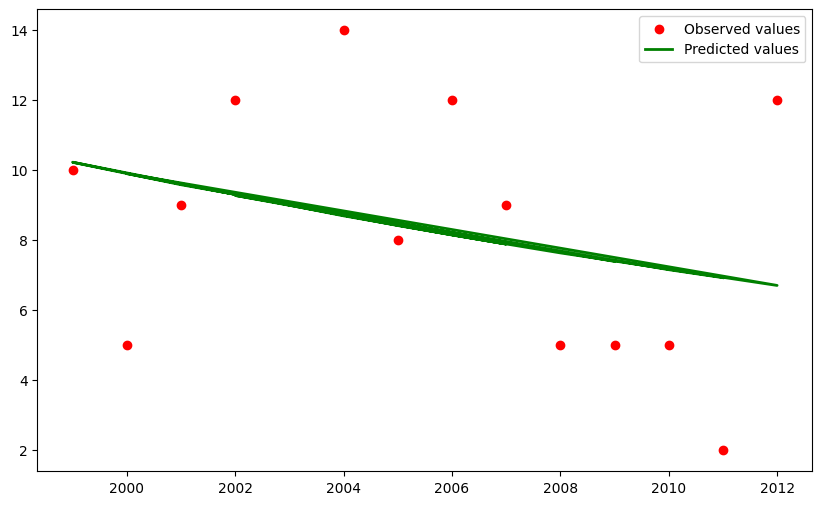

In [431]:
plt.figure(figsize=(10,6))
plt.scatter(x=X_cov, y=Y_resp,c='r', label="Observed values")
plt.plot(X_cov,Y_hat, color='green',linewidth=2,label="Predicted values")
plt.legend()
plt.show()



Use the model with the point estimates of the parameters to generate a three samples of data (hypothetical observations) from the time period.

Save the samples as a csv file, with a column indicating which sample it is.

use np.random.poisoson

In [432]:
lambda_sample = np.exp(betas[0] + betas[1] * X_standardised)
lambda_sample


array([ 6.93106801,  7.1596212 ,  9.28130668,  8.1517262 ,  7.63958583,
        6.70981082,  9.90350425,  8.4205308 ,  7.89150252,  8.69819928,
       10.23007405,  9.58735939,  7.39571096])

In [433]:
Y = np.random.poisson(lam=lambda_sample)
dummy_df = pd.DataFrame(
    {'count': Y,
    'yr': X_cov}
)
dummy_lst = []
dummy_lst.append(dummy_df)
dummy_lst.append(dummy_df)
dummy_all = pd.concat(dummy_lst, axis=1, keys=['set1','set2'])
dummy_all

set1        set2      
   count    yr count    yr
0      4  2011     4  2011
1      8  2010     8  2010
2     13  2002    13  2002
3     11  2006    11  2006
4      7  2008     7  2008
5     11  2012    11  2012
6     10  2000    10  2000
7      5  2005     5  2005
8      5  2007     5  2007
9      9  2004     9  2004
10    13  1999    13  1999
11    11  2001    11  2001
12     8  2009     8  2009

In [448]:
def poisson_samples(betas, X_std, X_label, n_samples):
    data = []
    lambda_sample = np.exp(betas[0] + betas[1] * X_std)
    for i in range(n_samples):
        Y = np.random.poisson(lam=lambda_sample)
        df_i = pd.DataFrame(
            {'count': Y,
            'yr': X_label,
            'sample': i + 1
        })
        data.append(df_i)

    return pd.concat(data, axis=0, ignore_index=True) 
        

In [449]:
samples = poisson_samples(betas=betas, X_std=X_standardised,X_label=X_cov, n_samples=3)
samples

,count,yr,sample
0,3,1999,1
1,8,2000,1
2,9,2001,1
3,15,2002,1
4,5,2003,1
5,6,2004,1
6,8,2005,1
7,7,2006,1
8,11,2007,1
9,8,2008,1


In [450]:
samples.to_csv('/Users/mexmex/Documents/3-Math_LU/HT2025/BERN02/Exercise 4/Data/samples', index=False)